Workflow
- Preprocessing Data
- Logistic Regression
- Visualisasi confussion matrix
- menyeleksi fitur-fitur penting
- memodelkan ulang Logistic Regression
- K-Nearest Neighbor
- Naive Bayes
- Decision Tree
- Random Forest
- Support Vector machine
- Membandingkan accuracy
- menentukan algoritma yang paling sesuai untuk prediksi

# Preprocessing Data

In [1]:
#import libraty yang dibutuhkan
import pandas as pd
#mendownload dan menuimpan file dataset
df=pd.read_csv('./dataset/bank-additional.csv', sep=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [2]:
pd.set_option('display.max.columns', None)

In [3]:
df.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
4114,30,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,53,1,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,no
4115,39,admin.,married,high.school,no,yes,no,telephone,jul,fri,219,1,999,0,nonexistent,1.4,93.918,-42.7,4.959,5228.1,no
4116,27,student,single,high.school,no,no,no,cellular,may,mon,64,2,999,1,failure,-1.8,92.893,-46.2,1.354,5099.1,no
4117,58,admin.,married,high.school,no,no,no,cellular,aug,fri,528,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
4118,34,management,single,high.school,no,yes,no,cellular,nov,wed,175,1,999,0,nonexistent,-0.1,93.200,-42.0,4.120,5195.8,no


In [4]:
df.shape

(4119, 21)

In [5]:
#memeriksa apakah terdapat missing value
df.isnull().any()

age               False
job               False
marital           False
education         False
default           False
housing           False
loan              False
contact           False
month             False
day_of_week       False
duration          False
campaign          False
pdays             False
previous          False
poutcome          False
emp.var.rate      False
cons.price.idx    False
cons.conf.idx     False
euribor3m         False
nr.employed       False
y                 False
dtype: bool

In [6]:
#mengcopy df untuk nantinya digunakan untuk diubah menjadi label numerik
df_bank=df.copy()
df_bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,487,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,346,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,227,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,17,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,58,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


## membuat label numerik pada variabel yang bertipe data categorical

In [7]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
job=le.fit_transform(df_bank['job'])
marital=le.fit_transform(df_bank['marital'])
education=le.fit_transform(df_bank['education'])
default=le.fit_transform(df_bank['default'])
housing=le.fit_transform(df_bank['housing'])
loan=le.fit_transform(df_bank['loan'])
contact=le.fit_transform(df_bank['contact'])
month=le.fit_transform(df_bank['month'])
day_of_week=le.fit_transform(df_bank['day_of_week'])
poutcome=le.fit_transform(df_bank['poutcome'])
y=le.fit_transform(df_bank['y'])

## mengubah dataframe yang bertipe categorical menjadi label numerik

In [8]:
df_bank['job']=job
df_bank['marital']=marital
df_bank['education']=education
df_bank['default']=default
df_bank['housing']=housing
df_bank['loan']=loan
df_bank['contact']=contact
df_bank['month']=month
df_bank['day_of_week']=day_of_week
df_bank['poutcome']=poutcome
df_bank['y']=y

In [9]:
df_bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,1,1,2,0,2,0,0,6,0,487,2,999,0,1,-1.8,92.893,-46.2,1.313,5099.1,0
1,39,7,2,3,0,0,0,1,6,0,346,4,999,0,1,1.1,93.994,-36.4,4.855,5191.0,0
2,25,7,1,3,0,2,0,1,4,4,227,1,999,0,1,1.4,94.465,-41.8,4.962,5228.1,0
3,38,7,1,2,0,1,1,1,4,0,17,3,999,0,1,1.4,94.465,-41.8,4.959,5228.1,0
4,47,0,1,6,0,2,0,0,7,1,58,1,999,0,1,-0.1,93.200,-42.0,4.191,5195.8,0


## membagi data menjadi train set san test set dengan train_test_split

In [10]:
#mengimport train test split
from sklearn.model_selection import train_test_split
#memasukan nama kolom independen variabel kedalam variabel
independen=['age','job','marital','education','default','housing',
           'loan','contact','month','day_of_week','duration','campaign',
           'pdays','previous','poutcome','emp.var.rate','cons.price.idx',
           'cons.conf.idx','euribor3m','nr.employed']
#memasukan variabel independen dan dependen ke masing-masing valiabel x,y
x=df_bank[independen]
y=df_bank['y']
#membagi data menjadi train set dan test set
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

## menormalkan data

In [11]:
#mebgimpor StandarScaler
from sklearn.preprocessing import StandardScaler
#membuat model scaler
scaler=StandardScaler()
#menyesuaikan model StandarScaler ke array, mengubahnya, dan mengembalikan array standar yang baru
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

# Logistic Regression

In [12]:
#mengimpor library yang diperlukan 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

In [13]:
#membuat model Logistic Regression
model=LogisticRegression(solver='liblinear',C=0.05,random_state=100)
model.fit(x_train,y_train)

LogisticRegression(C=0.05, random_state=100, solver='liblinear')

In [14]:
#mengevaluasi model
y_pred=model.predict(x_test)
accuracy_LR=accuracy_score(y_test,y_pred)
print('accuracy :',accuracy_LR)

accuracy : 0.9247572815533981


In [15]:
#melihat confusion matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[1086,   29],
       [  64,   57]], dtype=int64)

- True Negative:1079
- False Positive: 23
- False Negative:75
- True Positive :59

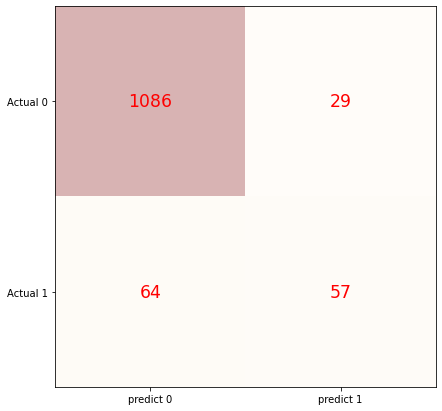

In [16]:
#memvisualisasikan confussion matrix
fig,ax=plt.subplots(figsize=(7,7))
ax.imshow(cm, cmap='OrRd', alpha=0.3)
ax.xaxis.set(ticks=(0,1), ticklabels=('predict 0', 'predict 1'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0','Actual 1'))
for i in range(2):
    for j in range(2):
        ax.text(j,i,cm[i,j], ha='center', va='center', color='red',size='xx-large')
plt.show()

## menyeleksi fitur-fitur yang penting

In [17]:
feature_imp=model.coef_[0]


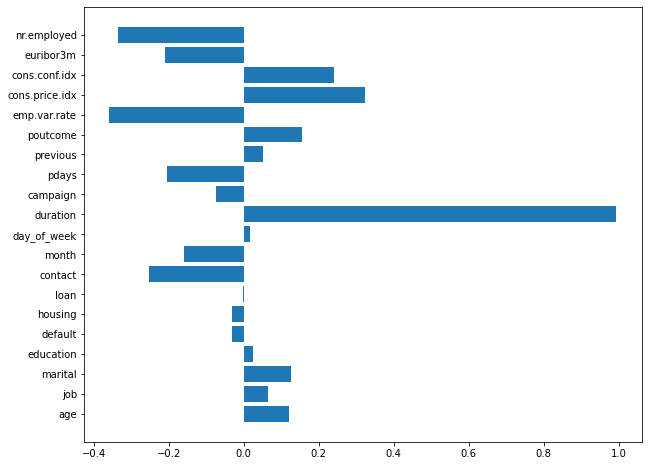

In [18]:
#membuat plot feature importance
plt.figure(figsize=(10,8))
plt.barh([x for x in (df_bank.columns[0:20])], feature_imp)
plt.show()

Dari grafik tersebut terdapat beberapa feature yang pengaruhnya sangat kecil terhadap hasil prediksi. Untuk itu beberapa feature tidak akan digunakan. Fitur yang tidak akan digunakan adalah :

- job
- default
- day_of_week
- loan

## membuat model baru dengan fitur yang dipilih

In [19]:
#menyimpan fitur-fitur penting 
df_bank_imp=df_bank.drop(columns=['default','job', 'day_of_week','loan'])
df_bank_imp.head()

,age,marital,education,housing,contact,month,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,1,2,2,0,6,487,2,999,0,1,-1.8,92.893,-46.2,1.313,5099.1,0
1,39,2,3,0,1,6,346,4,999,0,1,1.1,93.994,-36.4,4.855,5191.0,0
2,25,1,3,2,1,4,227,1,999,0,1,1.4,94.465,-41.8,4.962,5228.1,0
3,38,1,2,1,1,4,17,3,999,0,1,1.4,94.465,-41.8,4.959,5228.1,0
4,47,1,6,2,0,7,58,1,999,0,1,-0.1,93.200,-42.0,4.191,5195.8,0


In [20]:
#mengimport train test split
from sklearn.model_selection import train_test_split
#memasukan nama kolom independen variabel kedalam variabel
independen_imp=['education','contact','month','duration','campaign',
           'pdays','previous','poutcome','emp.var.rate',
            'cons.price.idx','cons.conf.idx','euribor3m','nr.employed']
#memasukan variabel independen dan dependen ke masing-masing valiabel x,y
x_imp=df_bank_imp[independen_imp]
y_imp=df_bank_imp['y']
#membagi data menjadi train set dan test set
x_train_imp,x_test_imp,y_train_imp,y_test_imp=train_test_split(x_imp,y_imp,test_size=0.3)

In [21]:
#mebgimpor StandarScaler
from sklearn.preprocessing import StandardScaler
#membuat model scaler
scaler=StandardScaler()
#menyesuaikan model StandarScaler ke array, mengubahnya, dan mengembalikan array standar yang baru
x_train_imp=scaler.fit_transform(x_train_imp)
x_test_imp=scaler.fit_transform(x_test_imp)

In [22]:
#membuat model Logistic Regression
model=LogisticRegression(solver='liblinear',C=0.05,random_state=100)
model.fit(x_train_imp,y_train_imp)
#mengevaluasi model
y_pred_imp=model.predict(x_test_imp)
accuracy_LR_imp=accuracy_score(y_test_imp,y_pred_imp)
print('accuracy :',accuracy_LR_imp)

accuracy : 0.9077669902912622


Setelah dilakukan seleksi pada fitur, maka terlihat bahwa akurasinya justru menurun 

In [23]:
#melihat confusion matrix
cm=confusion_matrix(y_test_imp,y_pred_imp)
cm

array([[1063,   33],
       [  81,   59]], dtype=int64)

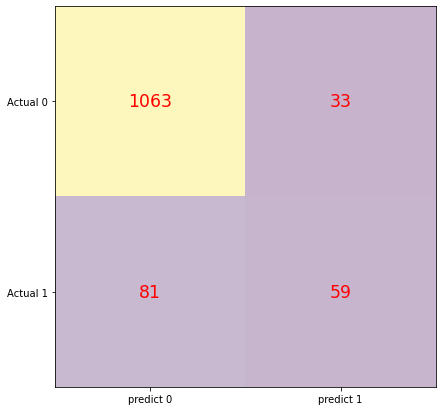

In [24]:
#memvisualisasikan confussion matrix
fig,ax=plt.subplots(figsize=(7,7))
ax.imshow(cm,alpha=0.3)
ax.xaxis.set(ticks=(0,1), ticklabels=('predict 0', 'predict 1'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0','Actual 1'))
for i in range(2):
    for j in range(2):
        ax.text(j,i,cm[i,j], ha='center', va='center', color='red',size='xx-large')
plt.show()

karena setelah dilakukan seleksi fitur peningkatannya tidak terlalu besar maka diputuskan untuk tetap menggunakan semu fitur

# K-Nearest Neighbor

In [25]:
#mengimpor modul yang diperlukan
from sklearn.neighbors import KNeighborsClassifier
#membuat model
model= KNeighborsClassifier(n_neighbors=5)
model.fit(x_train,y_train)
#melakukan prediksi
y_pred=model.predict(x_test)
#melihat akurasi model
accuracy_KNN=accuracy_score(y_test,y_pred)
print('Accuracy :', accuracy_KNN)


Accuracy : 0.9077669902912622


In [26]:
#meningkatkan akurasi dengan mengubah parameter n_neighbors
maks=0
for i in range (3,51):
    model= KNeighborsClassifier(n_neighbors=i)
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    accuracy_KNN=accuracy_score(y_test,y_pred)
    if accuracy_KNN>maks:
        maks=accuracy_KNN
        num=i

    
print('highest accuracy :',maks)
print('n_neighbors :', num)    


highest accuracy : 0.9142394822006472
n_neighbors : 15


Dari hasil tersebut akan dipilih k=23

In [27]:
#mengimpor modul yang diperlukan
from sklearn.neighbors import KNeighborsClassifier
#membuat model
model= KNeighborsClassifier(n_neighbors=23)
model.fit(x_train,y_train)
#melakukan prediksi
y_pred=model.predict(x_test)
#melihat akurasi model
accuracy_KNN=accuracy_score(y_test,y_pred)
print('Accuracy :', accuracy_KNN)

Accuracy : 0.9093851132686084


In [28]:
confusion_matrix(y_test,y_pred)

array([[1095,   20],
       [  92,   29]], dtype=int64)

# Naive Bayes

In [29]:
#mengimpor Gaussian NB dari modul sklearn
from sklearn.naive_bayes import GaussianNB
#membuat model
model=GaussianNB()
model.fit(x_train,y_train)
#membuat prediksi
y_pred=model.predict(x_test)
#melihat akurasi model
accuracy_GNB=accuracy_score(y_test,y_pred)
print('Accuracy :', accuracy_GNB)

Accuracy : 0.8648867313915858


In [30]:
confusion_matrix(y_test,y_pred)

array([[983, 132],
       [ 35,  86]], dtype=int64)

# Decision Tree

In [31]:
#mengimpor library yang dibutuhkan
from sklearn.tree import DecisionTreeClassifier
#membuat model
model=DecisionTreeClassifier(criterion='entropy')
model.fit(x_train,y_train)
#membuat prediksi
y_pred=model.predict(x_test)
#melihat akurasi model
accuracy_DT=accuracy_score(y_test,y_pred)
print('Accuracy :', accuracy_DT)

Accuracy : 0.8656957928802589


In [32]:
#meningkatkan akurasi dengan mengubah parameter max_depth
maks=0
for i in range (3,51):
    model= model=DecisionTreeClassifier(criterion='entropy', max_depth=i)
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    accuracy_DT=accuracy_score(y_test,y_pred)
    if accuracy_DT>maks:
        maks=accuracy_DT
        num=i

    
print('highest accuracy :',maks)
print('max_depth :', num) 

highest accuracy : 0.9085760517799353
max_depth : 3


Dari hasil tersebut akan digunakan parameter max_depth=4

In [33]:
#mengimpor library yang dibutuhkan
from sklearn.tree import DecisionTreeClassifier
#membuat model
model=DecisionTreeClassifier(criterion='entropy', max_depth=num)
model.fit(x_train,y_train)
#membuat prediksi
y_pred=model.predict(x_test)
#melihat akurasi model
accuracy_DT=accuracy_score(y_test,y_pred)
print('Accuracy :', accuracy_DT)

Accuracy : 0.9085760517799353


In [34]:
confusion_matrix(y_test,y_pred)

array([[1034,   81],
       [  32,   89]], dtype=int64)

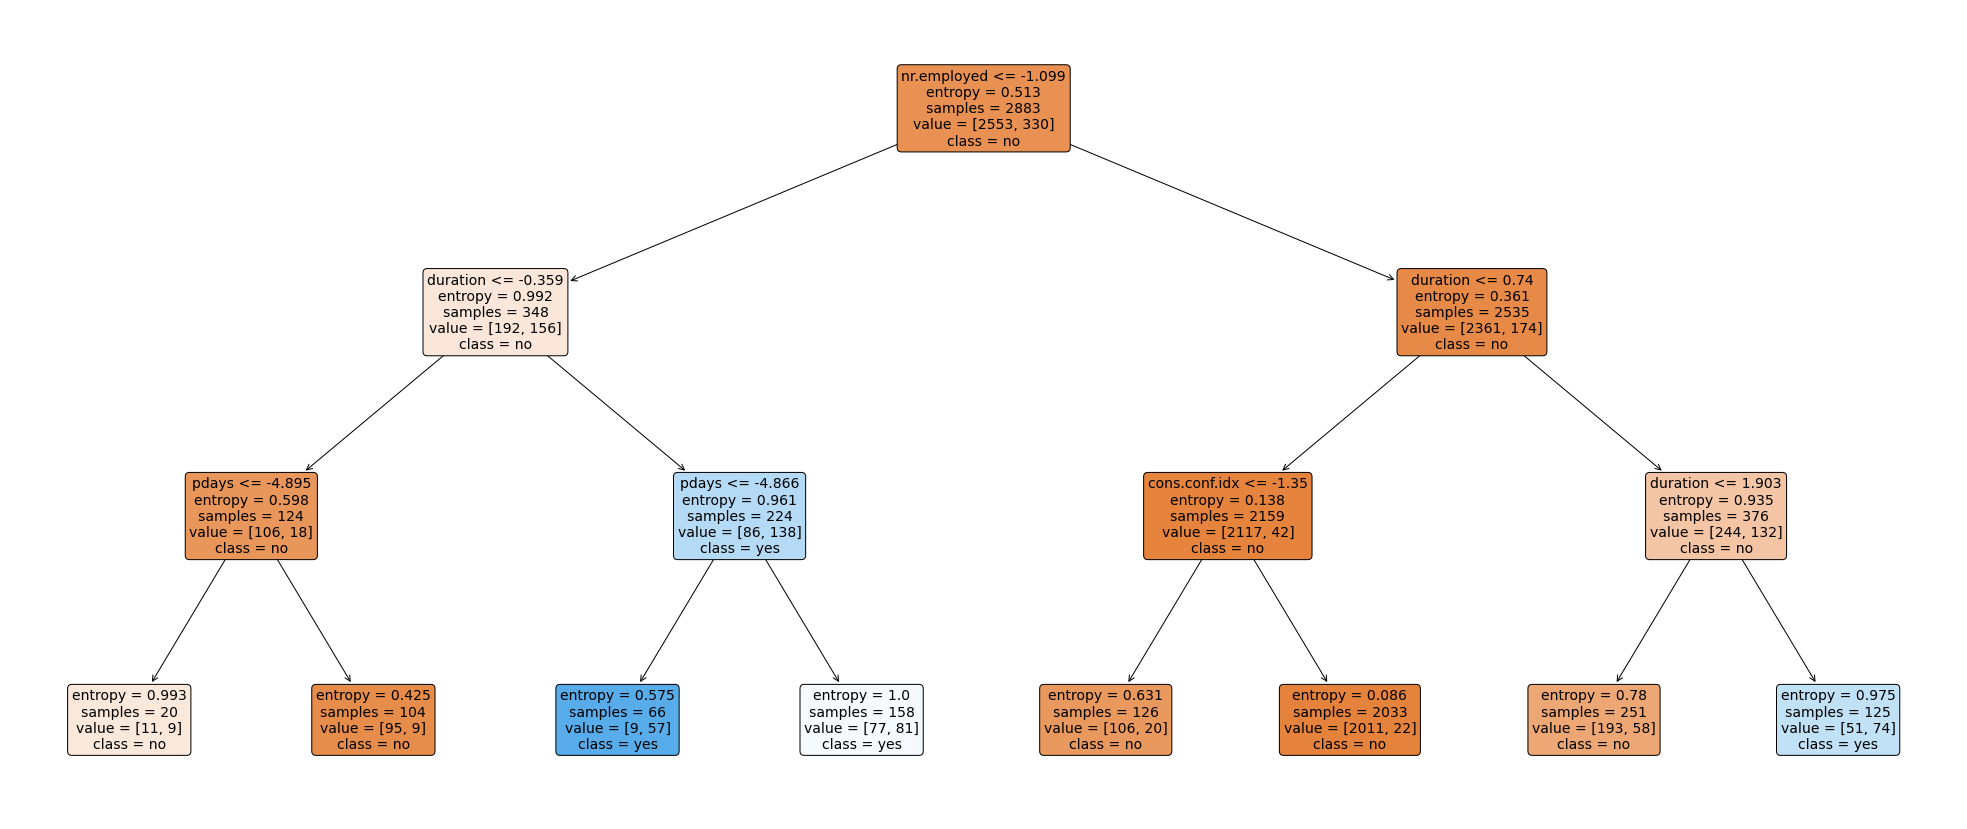

In [35]:
#mengimpor modul untuk visualisasi
from sklearn.tree import plot_tree
#memvisualisasikan decision tree
plt.figure(figsize=(35,15))
ax=plot_tree(model,
            feature_names=df_bank.columns[0:20],
            class_names=df['y'].unique(),
            filled=True,
            rounded=True,
            fontsize=14)

# Random Forest

In [36]:
#mengimpor modul random forest
from sklearn.ensemble import RandomForestClassifier
#membuat model
model=RandomForestClassifier(n_estimators=50)
model.fit(x_train,y_train)
#membuat prediksi
y_pred=model.predict(x_test)
#melihat akurasi model
accuracy_RF=accuracy_score(y_test,y_pred)
print('Accuracy :', accuracy_RF)

Accuracy : 0.9142394822006472


In [37]:
#meningkatkan akurasi dengan mengubah parameter n_neighbors
maks=0
for i in range (30,100):
    model=RandomForestClassifier(n_estimators=i)
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    accuracy_RF=accuracy_score(y_test,y_pred)
    if accuracy_RF>maks:
        maks=accuracy_RF
        num=i

    
print('highest accuracy :',maks)
print('n_estimators :', num) 

highest accuracy : 0.9207119741100324
n_estimators : 33


In [38]:
#mengimpor modul random forest
from sklearn.ensemble import RandomForestClassifier
#membuat model
model=RandomForestClassifier(n_estimators=num)
model.fit(x_train,y_train)
#membuat prediksi
y_pred=model.predict(x_test)
#melihat akurasi model
accuracy_RF=accuracy_score(y_test,y_pred)
print('Accuracy :', accuracy_RF)

Accuracy : 0.9174757281553398


In [39]:
confusion_matrix(y_test,y_pred)

array([[1078,   37],
       [  65,   56]], dtype=int64)

# Support Vector Machines

In [40]:
#mengimpor modul random forest
from sklearn import svm
#membuat model
model=svm.SVC(kernel='linear')
model.fit(x_train,y_train)
#membuat prediksi
y_pred=model.predict(x_test)
#melihat akurasi model
accuracy_SVM=accuracy_score(y_test,y_pred)
print('Accuracy :', accuracy_SVM)

Accuracy : 0.9134304207119741


In [41]:
confusion_matrix(y_test,y_pred)

array([[1088,   27],
       [  80,   41]], dtype=int64)

# Membandingkan akurasi

In [42]:
metode=['Logistic Regression','KNN','Naive Bayes','Decision Tree',
       'Random Forest','SVM']
accuracy=[accuracy_LR,accuracy_KNN,accuracy_GNB,accuracy_DT,
         accuracy_RF,accuracy_SVM]
accuracy_df=pd.DataFrame({'Algoritma':metode,'Accuracy':accuracy})
accuracy_df=accuracy_df.sort_values(by='Accuracy', ascending=False).reset_index(drop=True)
accuracy_df

,Algoritma,Accuracy
0,Logistic Regression,0.924757
1,Random Forest,0.917476
2,SVM,0.913430
3,KNN,0.909385
4,Decision Tree,0.908576
5,Naive Bayes,0.864887


Dari model-model yang telah dilatih menggunakan berbagai metode didapatkan akurasi tertinggi dengan menggunakan Logistic Regression.
Sehingga diputuskan untuk menggunakan Logistic Regression untuk melakukan prediksi